## Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## MNIST ("Modified National Institute of Standards and Technology") dataset 

In [7]:
from sklearn.datasets import fetch_openml

# fetch_openml() returns a Pandas DataFrame by default. 
# To avoid this and keep the same code as in the book, we use as_frame=False.
    # the data is returned as a NumPy array,

# 'mnist_784' is the name of the dataset to download
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [8]:
28 * 28

784

Saving figure some_digit_plot


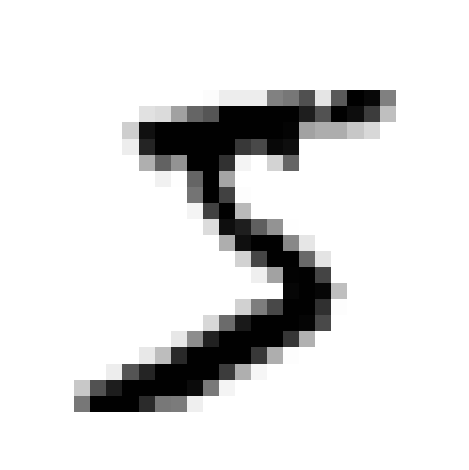

In [10]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

'''
- X contains a NumPy array with 70,000 rows (one for each image) and 784 columns (one for each pixel). 
- By selecting the first row of X with X[0], we get the pixel values of the first digit in the dataset.
'''
some_digit = X[0]
# This line reshapes the array into a 2D array with dimensions 28x28, which corresponds to the original dimensions of the digit image.
some_digit_image = some_digit.reshape(28, 28)
'''
- Matplotlib library to display the digit image
- cmap=mpl.cm.binary is used to specify that the colormap should be black and white 
    - (with black representing low pixel values and white representing high pixel values).
'''
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

save_fig("some_digit_plot")
plt.show()